### 8.1

In [5]:
import utils; from utils import rf
from threading import Thread 

# function that searches the given input for four different strings, in parallel
def FindMultipleOfK(inString): 
    # change input as int 
    K = int(inString.split(";")[0])
    m_is = list(map(int, inString.split(";")[1].split()))
    
    # create an empty list that will store our threads
    threads = [ ] 

    # create an object that can store a nondeterministic solution computed by
    # other threads
    ndSoln = utils.NonDetSolution() 

    # create the threads that will perform the nondeterministic computation
    for m in m_is: 
        # create a thread that will execute judgeDivisible(m, K, ndSoln)
        # when started; judgeDivisible is a helper function defined below
        t = Thread(target=judgeDivisible,    
                           args = (m, K, ndSoln)) 
        # append the newly created thread to our list of threads
        threads.append(t) 
    
    # Perform the nondeterministic computation. By definition, this means
    # that each thread is started, and we get a return value if either (a)
    # any thread reports a positive solution, or (b) all threads report
    # negative solutions.
    solution = utils.waitForOnePosOrAllNeg(threads, ndSoln) 

    return solution 

# judgeDivisible is a helper function that sets the nondeterministic solution to the
# value of str(m) if the m is divisible by K. This function is
# intended to be executed in a separate thread as part of a nondeterministic
# computation.
def judgeDivisible(m, K, ndSoln):  
    if m % K == 0: 
        ndSoln.setSolution("yes") 


In [6]:
print(FindMultipleOfK("823;18910 5235 3422"))
print(FindMultipleOfK("10;720 342 90"))

no
yes


### 8.6

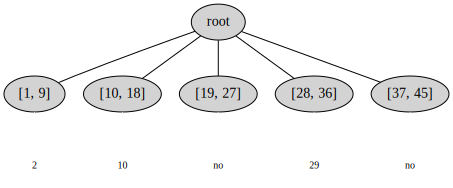

In [4]:
from graphviz import Graph

g = Graph()
g.attr('node', style='filled', fillcolor='lightgrey')
label = ['[1, 9]', '[10, 18]','[19, 27]', '[28, 36]', '[37, 45]']
sol = ['2', '10', 'no', '29', 'no ']

for i in range(len(label)):
    g.edge('root', label[i])

g.attr('node', style='filled', color='white', fillcolor='white', fontsize='10')
for i in range(len(label)):
    g.edge(label[i], sol[i], color='white')

g

### 8.11

### WTS
- $L_1, L_2$が認識可能であるならば, $L_1 \cup L_2$は認識可能であることを示す

### 証明
- $L_1$を認識するプログラムを$P_1$, $L_2$を認識するプログラムを$P_2$とする, 入力に対して$P_1, P_2$を非決定的に実行するプログラムをPとする.
- $L_1$に含まれる入力に対しては$P_1$を実行するスレッドがyesを返し, $L_2$に含まれる入力に対しては$P_2$を実行するスレッドがyesを返すため, $L_1 \cup L_2$の正インスタンスに対してはyesを返す
-　また, $L_1 \cup L_2$ の負インスタンスに対しては$P_1, P_2$を実行するどちらのスレッドもnoを返すか未定義状態となるため, $P$はnoを返すか未定義状態となる
- よって, $L_1 \cup L_2$ を認識可能である